# First Exam

**Student: Eberto Benjumea Mendoza**


First, do your research and discuss how to conduct a brand analysis. Then develop an analysis on the fashion trend of underwear and swimwear products. Datasets were created by extracting data from popular retail sites via PromptCloud data extraction solutions. Sites covered are; Amazon, Victoria's Secret, Btemptd, Calvin Klein, Hanky Panky, American Eagle, Macy's, Nordstrom, Topshop USA. Also, some of the most common questions that can be answered are: 


How does the pricing differ depending on the brand.

Topic modelling on the product description

What are the most common color used by different brands?

Analyses on the product rating

Common style attributes (wherever applicable)

Finally, perform a predictive analysis taking into account the algorithms seen in class.
Download dataset[here]



In [13]:
import io
import sys
PATH = '/home/student13/Eberto_Benjumea'
DIR_DATA = '../Data/First Exam/'
sys.path.append(PATH) if PATH not in list(sys.path) else None
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline

**Cargamos los datos**

In [2]:
name=['ae_com', 'amazon_com', 'btemptd_com', 'calvinklein_com', 'hankypanky_com', 'macys_com', 'shop_nordstrom_com', 'us_topshop_com', 'victoriassecret_com']
for i in range(0,len(name)):
    filename = DIR_DATA + name[i] + '.csv'
    #print(filename)
    dataname=name[i]+'_df'
    #print(dataname)
    exec(dataname+"=pd.read_csv(filename)")

**Verificamos si los dataframes tienen los mismos head**

In [3]:
head0=ae_com_df.columns.values.tolist()
head1=amazon_com_df.columns.values.tolist()
head2=btemptd_com_df.columns.values.tolist()
head3=calvinklein_com_df.columns.values.tolist()
head4=hankypanky_com_df.columns.values.tolist()
head5=macys_com_df.columns.values.tolist()
head6=shop_nordstrom_com_df.columns.values.tolist()
head7=us_topshop_com_df.columns.values.tolist()
head8=victoriassecret_com_df.columns.values.tolist()
if head0[0]==head1[0]==head2[0]==head3[0]==head4[0]==head5[0]==head6[0]==head7[0]==head8[0]:
    print("El head 0 es el mismo en todos los dataframes: ",head0[0])
if head0[1]==head1[1]==head2[1]==head3[1]==head4[1]==head5[1]==head6[1]==head7[1]==head8[1]:
    print("El head 1 es el mismo en todos los dataframes: ",head0[1])
if head0[2]==head1[2]==head2[2]==head3[2]==head4[2]==head5[2]==head6[2]==head7[2]==head8[2]:
    print("El head 2 es el mismo en todos los dataframes: ",head0[2])
if head0[3]==head1[3]==head2[3]==head3[3]==head4[3]==head5[3]==head6[3]==head7[3]==head8[3]:
    print("El head 3 es el mismo en todos los dataframes: ",head0[3])
if head0[4]==head1[4]==head2[4]==head3[4]==head4[4]==head5[4]==head6[4]==head7[4]==head8[4]:
    print("El head 4 es el mismo en todos los dataframes: ",head0[4])
if head0[5]==head1[5]==head2[5]==head3[5]==head4[5]==head5[5]==head6[5]==head7[5]==head8[5]:
    print("El head 5 es el mismo en todos los dataframes: ",head0[5])
if head0[6]==head1[6]==head2[6]==head3[6]==head4[6]==head5[6]==head6[6]==head7[6]==head8[6]:
    print("El head 6 es el mismo en todos los dataframes: ",head0[6])
if head0[7]==head1[7]==head2[7]==head3[7]==head4[7]==head5[7]==head6[7]==head7[7]==head8[7]:
    print("El head 7 es el mismo en todos los dataframes: ",head0[7])
if head0[8]==head1[8]==head2[8]==head3[8]==head4[8]==head5[8]==head6[8]==head7[8]==head8[8]:
    print("El head 8 es el mismo en todos los dataframes: ",head0[8])

El head 0 es el mismo en todos los dataframes:  product_name
El head 1 es el mismo en todos los dataframes:  mrp
El head 2 es el mismo en todos los dataframes:  price
El head 3 es el mismo en todos los dataframes:  pdp_url
El head 4 es el mismo en todos los dataframes:  brand_name
El head 5 es el mismo en todos los dataframes:  product_category
El head 6 es el mismo en todos los dataframes:  retailer
El head 7 es el mismo en todos los dataframes:  description
El head 8 es el mismo en todos los dataframes:  rating


**Unimos los dataframes:**

In [4]:
data = pd.concat([ae_com_df, amazon_com_df])
data= pd.concat([data, btemptd_com_df])
data= pd.concat([data, calvinklein_com_df])
data= pd.concat([data, hankypanky_com_df])
data= pd.concat([data, macys_com_df])
data= pd.concat([data, shop_nordstrom_com_df])
data= pd.concat([data, us_topshop_com_df])
data= pd.concat([data, victoriassecret_com_df])
data.index = range(data.shape[0])
data.tail(5)


,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
613138,Dream Angels NEW! Lace Mini Slip,$48.00,$48.00,https://www.victoriassecret.com/lingerie/shop-...,Victoria's Secret,Lace Mini Slip,Victoriassecret US,"All you need is a little lace, here in the cut...",NaN,NaN,NaN,"[""XS"", ""S"", ""M"", ""L"", ""XL""]",L,coconut white
613139,Dream Angels NEW! Lace Mini Slip,$48.00,$48.00,https://www.victoriassecret.com/lingerie/shop-...,Victoria's Secret,Lace Mini Slip,Victoriassecret US,"All you need is a little lace, here in the cut...",NaN,NaN,NaN,"[""XS"", ""S"", ""M"", ""L"", ""XL""]",L,mulled grape
613140,Dream Angels NEW! Lace Mini Slip,$48.00,$48.00,https://www.victoriassecret.com/lingerie/shop-...,Victoria's Secret,Lace Mini Slip,Victoriassecret US,"All you need is a little lace, here in the cut...",NaN,NaN,NaN,"[""XS"", ""S"", ""M"", ""L"", ""XL""]",M,sheer pink
613141,Dream Angels NEW! Lace Mini Slip,$48.00,$48.00,https://www.victoriassecret.com/lingerie/shop-...,Victoria's Secret,Lace Mini Slip,Victoriassecret US,"All you need is a little lace, here in the cut...",NaN,NaN,NaN,"[""XS"", ""S"", ""M"", ""L"", ""XL""]",M,coconut white
613142,Dream Angels NEW! Lace Mini Slip,$48.00,$48.00,https://www.victoriassecret.com/lingerie/shop-...,Victoria's Secret,Lace Mini Slip,Victoriassecret US,"All you need is a little lace, here in the cut...",NaN,NaN,NaN,"[""XS"", ""S"", ""M"", ""L"", ""XL""]",M,mulled grape


**Verificamos las dimensiones para comprobar la unión correcta de los dataframes**

In [5]:
t0=len(ae_com_df.index)
t1=len(amazon_com_df.index)
t2=len(btemptd_com_df.index)
t3=len(calvinklein_com_df.index)
t4=len(hankypanky_com_df.index)
t5=len(macys_com_df.index)
t6=len(shop_nordstrom_com_df.index)
t7=len(us_topshop_com_df.index)
t8=len(victoriassecret_com_df.index)
t9=len(data.index)
t10=t0+t1+t2+t3+t4+t5+t6+t7+t8
if t9==t10:
    print('Los dataframes están en contenidos en el dataframe Data')
print('Cantidad de filas en el dataframe final: ',t9)
print('Cantidad de filas sumadas en los dataframes: ',t10)

Los dataframes están en contenidos en el dataframe Data
Cantidad de filas en el dataframe final:  613143
Cantidad de filas sumadas en los dataframes:  613143


In [6]:
data.isnull().sum()

product_name             0
mrp                      0
price                    0
pdp_url                  0
brand_name               0
product_category         0
retailer                 0
description              0
rating              379587
review_count        391113
style_attributes    456468
total_sizes              0
available_size           0
color                  677
dtype: int64

In [7]:
data.dtypes

product_name         object
mrp                  object
price                object
pdp_url              object
brand_name           object
product_category     object
retailer             object
description          object
rating              float64
review_count        float64
style_attributes     object
total_sizes          object
available_size       object
color                object
dtype: object

In [8]:
data.head(10)

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Rugged Green
1,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Natural Nude
2,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",True Black
3,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",White
4,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Royal Navy
5,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Slab Gray
6,Aerie Lace Hi-Rise Boybrief,12.50 USD,12.50 USD,https://www.ae.com/undies-aerie-lace-hi-rise-b...,AERIE,Boybriefs,Ae US,Laced with love and extra comfort. No cheek pe...,4.8,NaN,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L""]",White
7,Aerie Lace Hi-Rise Boybrief,12.50 USD,12.50 USD,https://www.ae.com/undies-aerie-lace-hi-rise-b...,AERIE,Boybriefs,Ae US,Laced with love and extra comfort. No cheek pe...,4.8,NaN,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M""]",Natural Nude
8,Aerie Lace Hi-Rise Boybrief,12.50 USD,12.50 USD,https://www.ae.com/undies-aerie-lace-hi-rise-b...,AERIE,Boybriefs,Ae US,Laced with love and extra comfort. No cheek pe...,4.8,NaN,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S""]",True Black
9,Aerie Lace Hi-Rise Boybrief,12.50 USD,12.50 USD,https://www.ae.com/undies-aerie-lace-hi-rise-b...,AERIE,Boybriefs,Ae US,Laced with love and extra comfort. No cheek pe...,4.8,NaN,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M""]",Buff


**Normalizamos registros:**

In [11]:
data['rating']=data['rating'].fillna(0.0)
data['review_count']=data['review_count'].fillna(0.0)
data['style_attributes'].fillna('["N/A"]', inplace = True)
data['color'].fillna("N/A", inplace = True)

In [12]:
data.isnull().sum()

product_name        0
mrp                 0
price               0
pdp_url             0
brand_name          0
product_category    0
retailer            0
description         0
rating              0
review_count        0
style_attributes    0
total_sizes         0
available_size      0
color               0
dtype: int64

**Consultamos los precios:**

/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


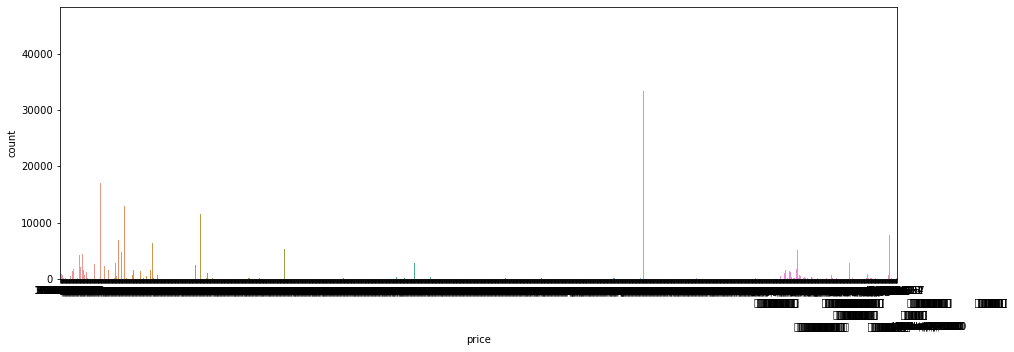

In [14]:
fig,ax=plt.subplots(figsize=(15,5))
ax=sns.countplot(data['price'])
plt.show()

**Normalizamos los precios a la misma divisa (USD) y quitamos los simbolos de moneda:**

In [15]:
import re

colon_to_usd_conversion = 0.0015
indrp_to_usd_conversion = 0.000070

def extract_usd_value(valor):
    if type(valor) is str:
        valor= valor.strip().lower().replace('usd', '').replace('$','').replace("\-.*","").strip()
        valor = re.sub(r"-.*", "", valor)
        valor = re.sub(r"–.*", "", valor)
        valor = re.sub(r"\s.*", "", valor)
        valor.strip()
        
        if "₡" in valor:
            valor = valor.replace("₡", "").strip()
            valor = pd.to_numeric(valor) * colon_to_usd_conversion            
        elif "rp" in valor:
            valor = valor.replace("rp", "").strip()
            valor = pd.to_numeric(valor) * indrp_to_usd_conversion                
            
        return valor
    else:
        return valor
    
data['mrp']=data['mrp'].apply(extract_usd_value).apply(pd.to_numeric)
data['price']=data['price'].apply(extract_usd_value).apply(pd.to_numeric)

In [17]:
data.head(5)

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,Aerie Everyday Loves Lace Cheeky,12.5,12.5,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Rugged Green
1,Aerie Everyday Loves Lace Cheeky,12.5,12.5,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Natural Nude
2,Aerie Everyday Loves Lace Cheeky,12.5,12.5,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",True Black
3,Aerie Everyday Loves Lace Cheeky,12.5,12.5,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",White
4,Aerie Everyday Loves Lace Cheeky,12.5,12.5,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Royal Navy


**Revisamos si no hay labels duplicadas para marcas:**

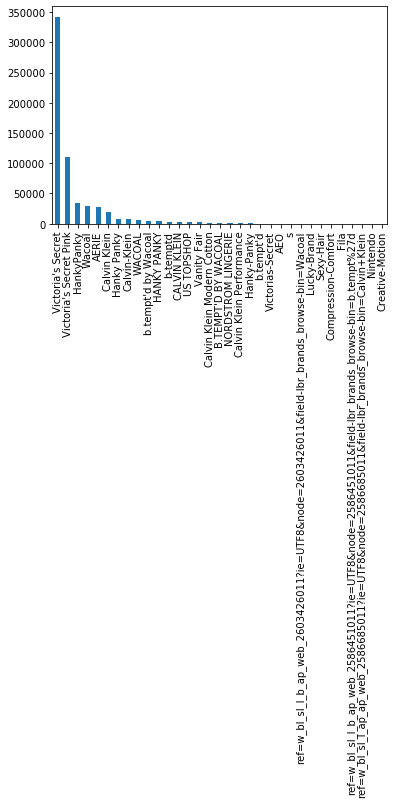

In [19]:
pd.value_counts(data['brand_name']).plot.bar()
plt.show()

**Unificamos las labels repetidas:**

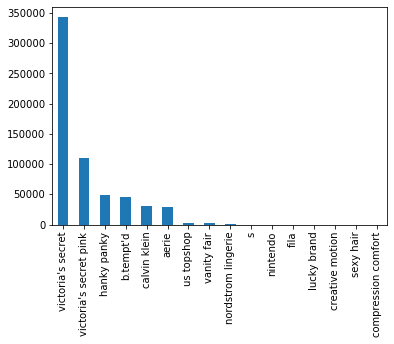

In [21]:
def unir_marcas(brand_name):
    brand_name = brand_name.lower()
    brand_name = brand_name.replace("-", " ")
    
    if "hanky" in brand_name:
        brand_name = "hanky panky"
    elif "calvin" in brand_name:
        brand_name = "calvin klein"
    elif "wacoal" in brand_name or "tempt" in brand_name:
        brand_name = "b.tempt'd"
    elif "victorias" in brand_name:
        brand_name = "victoria's secret"
    elif "aeo" in brand_name:
        brand_name = "aerie"
    brand_name = brand_name.strip()
    return brand_name
data['brand_name'] = data['brand_name'].apply(unir_marcas)
pd.value_counts(data['brand_name']).plot.bar()
plt.show()

In [23]:
brand_counts = pd.value_counts(data['brand_name'])
print(brand_counts)

victoria's secret         342600
victoria's secret pink    110853
hanky panky                48302
b.tempt'd                  45273
calvin klein               31251
aerie                      28328
us topshop                  3082
vanity fair                 2575
nordstrom lingerie           870
s                              3
nintendo                       1
fila                           1
lucky brand                    1
creative motion                1
sexy hair                      1
compression comfort            1
Name: brand_name, dtype: int64
